<Axes: >

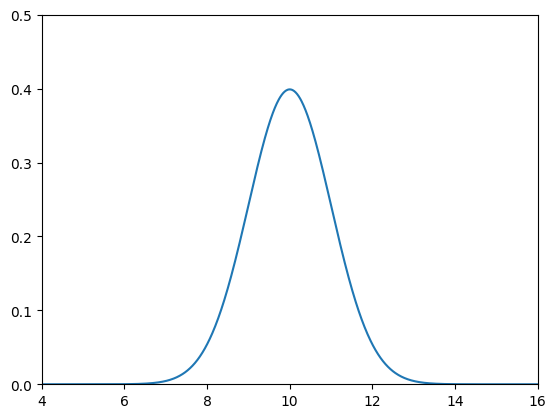

In [16]:
import filterpy.stats as stats
stats.plot_gaussian_pdf(mean=10., variance=1.,
xlim=(4, 16), ylim=(0, .5))

Mean of readings is 10.027


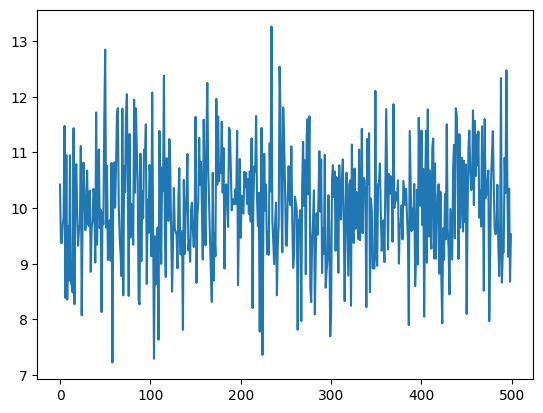

In [17]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
xs = range(500)
ys = randn(500)*1. + 10.
plt.plot(xs, ys)
print('Mean of readings is {:.3f}'.format(np.mean(ys)))

Prediction

In [18]:
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '(={:.3f}, 2={:.3f})'.format(s[0], s[1])

In [19]:
g1 = gaussian(3.4, 10.1)
g2 = gaussian(mean=4.5, var=0.2**2)
print(g1)
print(g2)

(=3.400, 2=10.100)
(=4.500, 2=0.040)


In [20]:
g1.mean, g1[0], g1[1], g1.var

(3.4, 3.4, 10.1, 10.1)

In [21]:
def predict(pos, movement):
  return gaussian(pos.mean + movement.mean, pos.var + movement.var)

In [22]:
pos = gaussian(10., .2**2)
move = gaussian(15., .7**2)
predict(pos, move)

(=25.000, 2=0.530)

Updation


In [23]:
def gaussian_multiply(g1, g2):
  mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
  variance = (g1.var * g2.var) / (g1.var + g2.var)
  return gaussian(mean, variance)

def update(prior, likelihood):
  posterior = gaussian_multiply(likelihood, prior)
  return posterior

# test the update function
predicted_pos = gaussian(10., .2**2)
measured_pos = gaussian(11., .1**2)
estimated_pos = update(predicted_pos, measured_pos)
estimated_pos

(=10.800, 2=0.008)

In [24]:
def update_dog(dog_pos, measurement):
  estimated_pos = gaussian_multiply(measurement, dog_pos)
  return estimated_pos

Gaussian multiplication


(=10.000, 2=0.500)


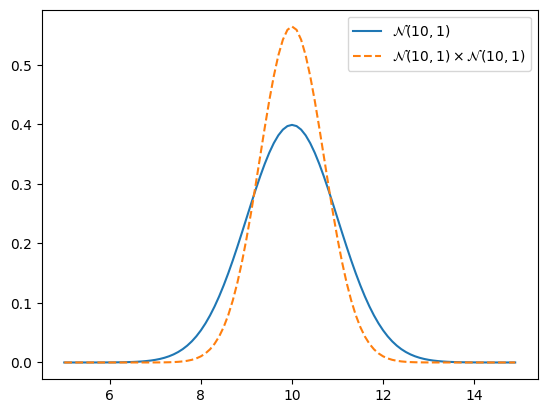

In [25]:
z = gaussian(10., 1.) # Gaussian N(10, 1)
product = gaussian_multiply(z, z)
xs = np.arange(5, 15, 0.1)
ys = [stats.gaussian(x, z.mean, z.var) for x in xs]
plt.plot(xs, ys, label=r'$\mathcal{N}(10,1)$')
ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label=r'$\mathcal{N}(10,1) \times \mathcal{N}(10,1)$', ls='--')
plt.legend()
print(product)

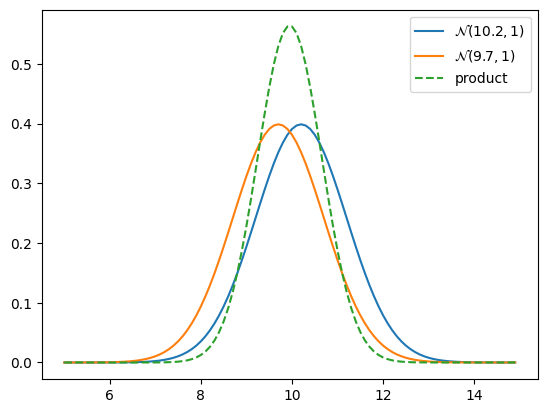

In [26]:
def plot_products(g1, g2):
  plt.figure()
  product = gaussian_multiply(g1, g2)
  xs = np.arange(5, 15, 0.1)
  ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
  plt.plot(xs, ys, label =r'$\mathcal{N}$'+'$({},{})$'.format(g1.mean, g1.var))
  ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
  plt.plot(xs, ys, label=r'$\mathcal{N}$'+'$({},{})$'.format(g2.mean, g2.var))
  ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
  plt.plot(xs, ys, label=r'product', ls='--')
  plt.legend();

z1 = gaussian(10.2, 1)
z2 = gaussian(9.7, 1)
plot_products(z1, z2)

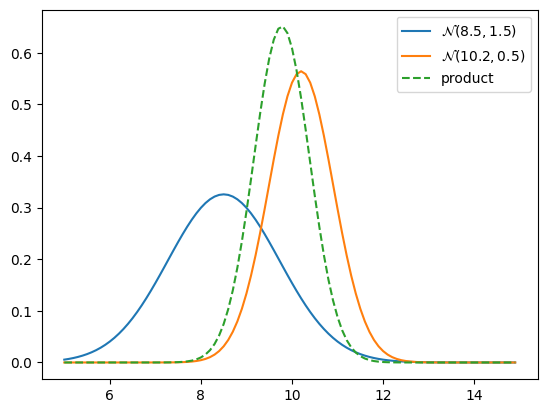

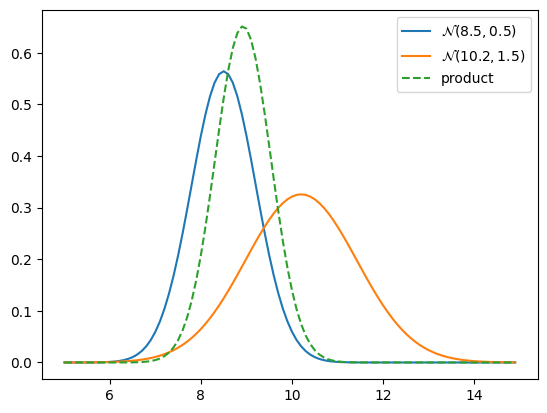

In [27]:
prior, z = gaussian(8.5, 1.5), gaussian(10.2, 0.5)
plot_products(prior, z)
prior, z = gaussian(8.5, 0.5), gaussian(10.2, 1.5)
plot_products(prior, z)